In [2]:
import numpy as np
import numpy.random as rng
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc3 as pm
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
plt.style.use('bmh')
%matplotlib inline

In [3]:
import theano
theano.config.warn.round=False

In [33]:
# observed data
np.random.seed(123)
n = 11
_a = 6
_b = 2
x = np.linspace(0, 1, n)
y = _a*x + _b + np.random.randn(n)

In [34]:
niter = 10000
with pm.Model() as linreg:
    a = pm.Normal('a', mu=0, sd=100)
    b = pm.Normal('b', mu=0, sd=100)
    sigma = pm.HalfNormal('sigma', sd=1)

    y_est = a*x + b
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)

    trace = pm.sample(niter, random_seed=123)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:16<00:00, 2543.13draws/s]


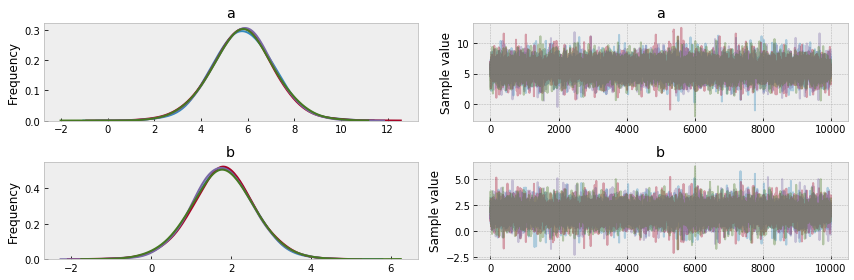

In [35]:
t = trace[niter//2:]
pm.traceplot(trace, varnames=['a', 'b'])
pass

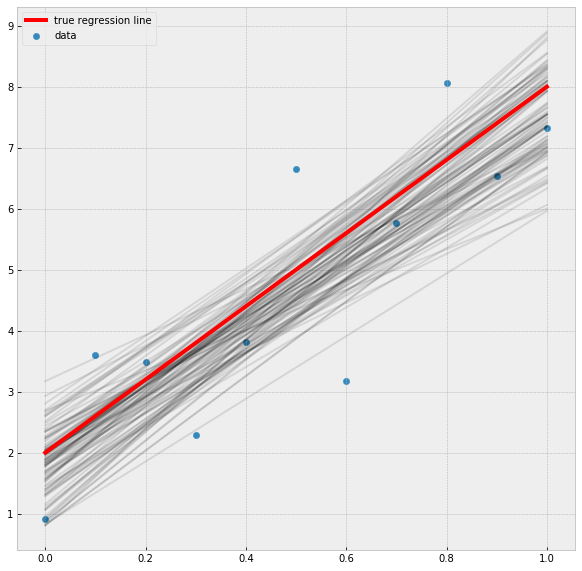

In [36]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.scatter(x, y, s=40, label='data')
for a_, b_ in zip(t['a'][-100:], t['b'][-100:]):
    ax.plot(x, a_*x + b_, c='black', alpha=0.1)
ax.plot(x, _a*x + _b, label='true regression line', lw=4., c='red')
ax.legend(loc='best')
plt.savefig("bayes-lin-reg.png")